In [11]:
import sys
import numpy as np
import matplotlib
import librosa
from matplotlib import pyplot as plt
import librosa.display
import soundfile

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

In [12]:
Fs = 16000
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
cmap_plot = plt.cm.bone_r

In [13]:
wavefile = 'D:/YYN/audio_/digitrec/segmented/YouYeNa/3/kdigits0-3.wav'
x , sr = librosa.load(wavefile , sr=16000)
# 목소리 나오는 부분
x = x[int(Fs*0.5):int(Fs*1.5)]
print(x.shape)


(16000,)


In [14]:
## Upsampling ##
# 32k: 2*Fs, 48k: 3*Fs, 44k: 2.75*Fs
ratio = 2.75
x1 = np.zeros(int(ratio*Fs))
for i in range(len(x)):
    x1[int(i*ratio)]= x[i]

a = signal.firwin(51, 0.3, window='hamming',pass_zero='lowpass')
x2 = signal.lfilter(a, [1.0], x1)

print(x2.shape)

(44000,)


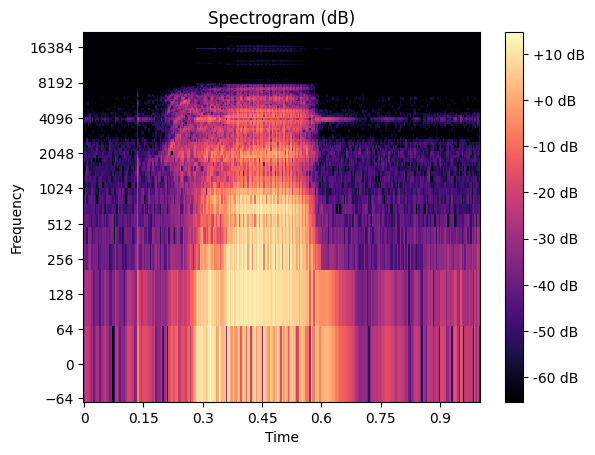

In [15]:
# stft
stft = librosa.stft(x2, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

# plot
plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs*ratio, hop_length=Ns, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

# soundfile.write('D:/YYN/audio_/resample/up.wav',x2,sr)